In [1]:
import pandas as pd

In [2]:
import ast


df = pd.read_csv("gpt_confidence_benchmark_MedMCQA_shuffled.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"['A', ')', ' At', 'rophy', '\n', 'Conf', 'iden...","[-0.0016491144, -4.3202e-07, -8.89548e-06, -9....","[99.83522446419776, 99.99995679800934, 99.9991...",C
1,"['B', ')', ' Vitamin', ' B', '12', '\n', 'Conf...","[-0.00058079255, -7.89631e-07, -7.3458323e-06,...","[99.94193760773456, 99.99992103693117, 99.9992...",C
2,"['A', ')', ' In', 'tran', 'uclear', ' receptor...","[-2.9151802, -3.4121115e-06, -0.0032232257, -3...","[5.41942643465862, 99.99965878943212, 99.67819...",B
3,"['B', ')', ' M', 'ite', '\n', 'Conf', 'idence'...","[-0.00028362326, -1.9361265e-07, -2.4584822e-0...","[99.97164169572746, 99.99998063873687, 99.9997...",C
4,"['B', ')', ' P', 'ilon', 'idal', ' sinus', '\n...","[-0.31634593, -1.8624639e-06, -3.1737043e-06, ...","[72.88072902493822, 99.99981375378344, 99.9996...",C
...,...,...,...,...
995,"['D', ')', ' CR', 'F', ' \n\n', 'Conf', 'idenc...","[-0.18918402, -1.7432603e-06, -7.529192e-05, -...","[82.76341914367283, 99.99982567412195, 99.9924...",A
996,"['B', ')', ' D', 'ens', ' inv', 'ag', 'in', 'a...","[-0.006825367, -5.5122365e-07, -5.3193703e-06,...","[99.31978729136361, 99.9999448776502, 99.99946...",B
997,"['B', ')', ' Contr', 'al', 'ateral', ' weaknes...","[-0.03809772, -5.5122365e-07, -8.061054e-06, -...","[96.26188691790344, 99.9999448776502, 99.99919...",A
998,"['C', ')', ' Abs', 'ence', ' of', ' sweating',...","[-0.019023098, -1.9361265e-07, -2.6968896e-06,...","[98.11566992236331, 99.99998063873687, 99.9997...",B


In [3]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to find the last integer or decimal number, optionally in parentheses
    match = re.search(r'(\d+(\.\d+)?)\)?\s*$', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 256
Frequency of Not Confident Correct Answers: 0
Frequency of Confident Incorrect Answers: 736
Frequency of Not Confident Incorrect Answers: 7


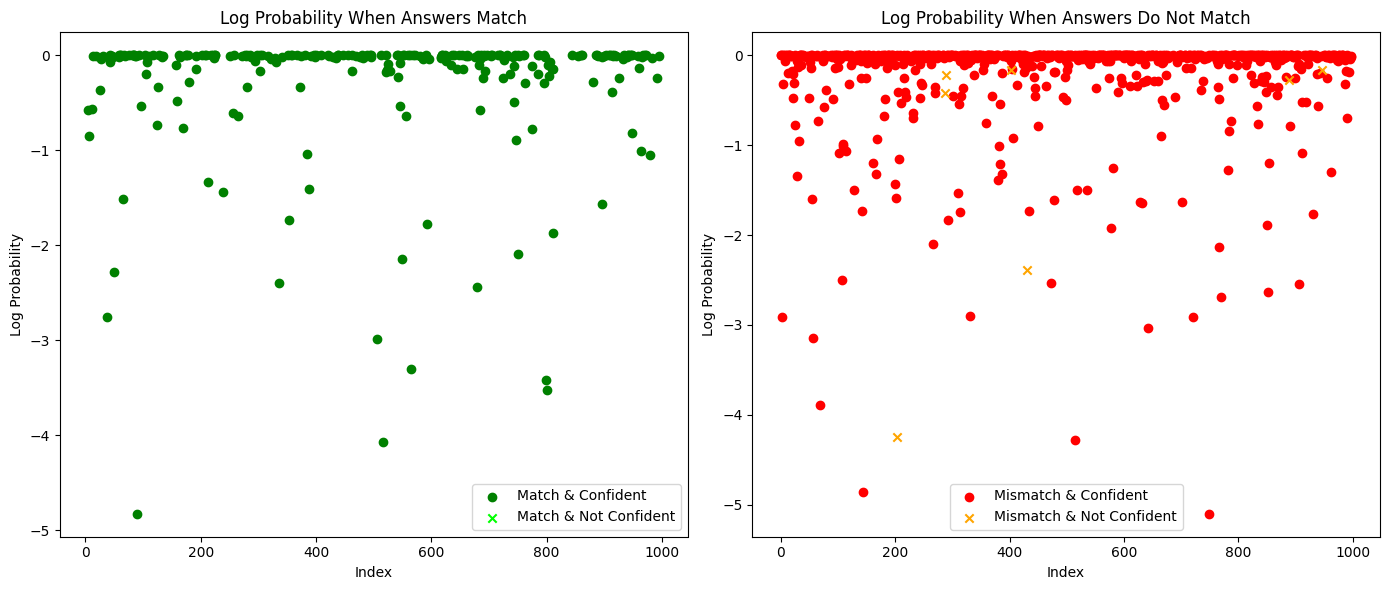

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses